# Clase 6 - APIs

<a href="https://colab.research.google.com/github/HesusG/bedu-data-processing/blob/main/clase_6_Ejemplos.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [14]:
!pip install requests
!pip install plotly
!pip install nbformat
!pip install ipywidgets



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [15]:
!pip freeze

appnope==0.1.3
asttokens==2.2.1
attrs==23.1.0
backcall==0.2.0
certifi==2023.7.22
charset-normalizer==3.2.0
comm==0.1.3
contourpy==1.1.0
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.40.0
idna==3.4
ipykernel==6.24.0
ipython==8.14.0
ipywidgets==8.1.0
jedi==0.18.2
jsonschema==4.19.0
jsonschema-specifications==2023.7.1
jupyter_client==8.3.0
jupyter_core==5.3.1
jupyterlab-widgets==3.0.8
kiwisolver==1.4.4
matplotlib==3.7.2
matplotlib-inline==0.1.6
nbformat==5.9.2
nest-asyncio==1.5.6
numpy==1.25.1
packaging==23.1
pandas==2.0.3
parso==0.8.3
pexpect==4.8.0
pickleshare==0.7.5
Pillow==10.0.0
platformdirs==3.8.1
plotly==5.15.0
prompt-toolkit==3.0.39
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
Pygments==2.15.1
pyparsing==3.0.9
python-dateutil==2.8.2
pytz==2023.3
pyzmq==25.1.0
referencing==0.30.2
requests==2.31.0
rpds-py==0.9.2
seaborn==0.12.2
six==1.16.0
sklearn==0.0.post5
stack-data==0.6.2
tenacity==8.2.2
tornado==6.3.2
traitlets==5.9.0
tz

In [16]:
import requests
import json
import pandas as pd
import seaborn as sns
from pandas import json_normalize

# OPEN API

In [17]:
# Endpoint 
URL = "https://api.openbrewerydb.org/breweries"

response = requests.get(URL)

# Ejemplo simple.
if response.status_code == 200:
    breweries = response.json()
    print(f"Descargamos un total {len(breweries)} cervezeras.")
else:
    print(f"Error: {response.status_code}")


Descargamos un total 50 cervezeras.


In [18]:
breweries

[{'id': '5128df48-79fc-4f0f-8b52-d06be54d0cec',
  'name': '(405) Brewing Co',
  'brewery_type': 'micro',
  'address_1': '1716 Topeka St',
  'address_2': None,
  'address_3': None,
  'city': 'Norman',
  'state_province': 'Oklahoma',
  'postal_code': '73069-8224',
  'country': 'United States',
  'longitude': '-97.46818222',
  'latitude': '35.25738891',
  'phone': '4058160490',
  'website_url': 'http://www.405brewing.com',
  'state': 'Oklahoma',
  'street': '1716 Topeka St'},
 {'id': '9c5a66c8-cc13-416f-a5d9-0a769c87d318',
  'name': '(512) Brewing Co',
  'brewery_type': 'micro',
  'address_1': '407 Radam Ln Ste F200',
  'address_2': None,
  'address_3': None,
  'city': 'Austin',
  'state_province': 'Texas',
  'postal_code': '78745-1197',
  'country': 'United States',
  'longitude': None,
  'latitude': None,
  'phone': '5129211545',
  'website_url': 'http://www.512brewing.com',
  'state': 'Texas',
  'street': '407 Radam Ln Ste F200'},
 {'id': 'ef970757-fe42-416f-931d-722451f1f59c',
  'name

In [19]:
df_breweries = pd.DataFrame(breweries)
df_breweries.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,None,Oregon,1135 NW Galveston Ave Ste B


In [20]:
df_breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              50 non-null     object
 1   name            50 non-null     object
 2   brewery_type    50 non-null     object
 3   address_1       47 non-null     object
 4   address_2       1 non-null      object
 5   address_3       0 non-null      object
 6   city            50 non-null     object
 7   state_province  50 non-null     object
 8   postal_code     50 non-null     object
 9   country         50 non-null     object
 10  longitude       40 non-null     object
 11  latitude        40 non-null     object
 12  phone           45 non-null     object
 13  website_url     39 non-null     object
 14  state           50 non-null     object
 15  street          47 non-null     object
dtypes: object(16)
memory usage: 6.4+ KB


In [21]:
df_breweries.isna().sum().sort_values(ascending=False)

address_3         50
address_2         49
website_url       11
longitude         10
latitude          10
phone              5
address_1          3
street             3
id                 0
name               0
brewery_type       0
city               0
state_province     0
postal_code        0
country            0
state              0
dtype: int64

In [22]:
df_breweries['longitude']

0     -97.46818222
1             None
2      -117.129593
3      -121.281706
4     -121.3288021
5     -122.6855056
6     -121.2809536
7      -116.202929
8     -104.9853655
9     -119.7732015
10      -86.627954
11    -122.8755823
12     -122.665055
13    -104.8667206
14    -93.38952559
15    -70.94594149
16     -95.5186591
17    -118.9218754
18    -6.979343891
19            None
20            None
21    -111.5860662
22     -122.485982
23    -84.43116792
24    -105.1319826
25            None
26    -84.70634815
27            None
28    -122.6487531
29            None
30     -118.802397
31            None
32    -104.9839636
33            None
34     -84.3183801
35    -75.37816436
36     -75.2565195
37            None
38     -93.6120353
39    -75.97176063
40            None
41    -80.15020356
42      -88.750264
43    -87.90606942
44    -119.9036592
45    -87.26887786
46      -87.517422
47     -89.0503635
48    -110.9927505
49    -122.2415652
Name: longitude, dtype: object

In [23]:
df_breweries = df_breweries.dropna(subset=['latitude', 'longitude'])

In [24]:
df_breweries

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
2,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,None,Oregon,1135 NW Galveston Ave Ste B
5,e432899b-7f58-455f-9c7b-9a6e2130a1e0,10 Barrel Brewing Co,large,1411 NW Flanders St,None,None,Portland,Oregon,97209-2620,United States,-122.6855056,45.5259786,5032241700,http://www.10barrel.com,Oregon,1411 NW Flanders St
6,9f1852da-c312-42da-9a31-097bac81c4c0,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,None,None,Bend,Oregon,97701,United States,-121.2809536,44.0912109,5415851007,None,Oregon,62950 NE 18th St
7,ea4f30c0-bce6-416b-8904-fab4055a7362,10 Barrel Brewing Co - Boise,large,826 W Bannock St,None,None,Boise,Idaho,83702-5857,United States,-116.202929,43.618516,2083445870,http://www.10barrel.com,Idaho,826 W Bannock St
8,1988eb86-f0a2-4674-ba04-02454efa0d31,10 Barrel Brewing Co - Denver,large,2620 Walnut St,None,None,Denver,Colorado,80205-2231,United States,-104.9853655,39.7592508,7205738992,None,Colorado,2620 Walnut St
9,1ecc330f-6275-42a5-b14e-00adbed62752,10 Torr Distilling and Brewing,micro,490 Mill St,None,None,Reno,Nevada,89502,United States,-119.7732015,39.5171702,7755307014,http://www.10torr.com,Nevada,490 Mill St
10,7531dbd8-afc9-4b5b-95bc-7ece7f2c0bf3,10-56 Brewing Company,micro,400 Brown Cir,None,None,Knox,Indiana,46534,United States,-86.627954,41.289715,6308165790,None,Indiana,400 Brown Cir


In [25]:
df_breweries.reset_index(drop=True, inplace = True)

In [26]:
df_breweries['latitude'] = pd.to_numeric(df_breweries['latitude'], errors='coerce')
df_breweries['longitude'] = pd.to_numeric(df_breweries['longitude'], errors='coerce')


In [33]:
import plotly.express as px

fig = px.scatter_mapbox(df_breweries, lon='longitude', lat='latitude', hover_name='brewery_type')
fig.update_layout(mapbox_style='open-street-map')
fig.show()

## Reto 1 - En equipos

In [39]:
# CityBik API endpoint to fetch networks
URL = "http://api.citybik.es/v2/networks"

# Make a request to get networks
response_networks = requests.get(URL)

if response_networks.status_code == 200:
    networks = response_networks.json()['networks']
    
    # Select one of the networks (for example, the first one)
    network_id = networks[30]['id']
    
    # URL to fetch stations of a specific network
    STATIONS = f"http://api.citybik.es/v2/networks/{network_id}"
    
    # Make a request to get stations
    response_stations = requests.get(STATIONS)
    
    if response_stations.status_code == 200:
        stations = response_stations.json()['network']['stations']
        
        # Create a DataFrame
        df_stations = pd.DataFrame.from_records(stations)
        
        # Plot using Plotly Express
        fig = px.scatter_mapbox(df_stations, lon='longitude', lat='latitude', hover_name='name', title='Bike Stations', size='free_bikes')
        fig.update_layout(mapbox_style='open-street-map')
        fig.show()
    else:
        print(f"Error fetching stations data: {response_stations.status_code}")
else:
    print(f"Error fetching networks data: {response_networks.status_code}")

In [38]:
df_stations

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp
0,None,{'uid': '539ddec5-682d-4600-b9ac-079ae161f47a'},0,b2f5f69e3edeaf694c04079d66f58189,53.556090,9.984340,U Gänsemarkt / Caffamacherreihe,2023-08-08T03:57:28.717000Z
1,None,{'uid': '63c44fb8-2ebf-47a6-9176-5e90e29afc90'},1,099e9b9967e2e0d1b155fafd9527b5f0,53.555000,9.991400,Jungfernstieg / Neuer Jungfernstieg,2023-08-08T03:57:28.661000Z
2,None,{'uid': 'be56fa9c-c6c3-4eda-8433-978f4fae2640'},0,19a982fe4922c5ce05d83cea4fe9d6c3,53.547975,9.979420,Michaeliskirche / Krayenkamp,2023-08-08T03:57:28.607000Z
3,None,{'uid': 'efb44165-7b0f-4431-a60e-ba58103213a8'},1,28e075055097e0c30be957964d319f59,53.552244,9.995501,S+U Jungfernstieg / Ballindamm,2023-08-08T03:57:28.606000Z
4,None,{'uid': '6a2e2809-5926-4c57-a4ad-c0c14ce4c81a'},2,1f9b06050ea50b03a64684fa4975e0d8,53.547486,9.994057,Domstraße / Willy-Brandt-Straße,2023-08-08T03:57:28.601000Z
...,...,...,...,...,...,...,...,...
299,None,{'uid': 'b3fdb749-1813-4d83-a78c-7120b6d08811'},11,49d0a457a4b2155e081c3a696a38be8e,53.460407,9.983319,Herbert-Wehner-Platz / Großer Schippsee,2023-08-08T03:57:28.531000Z
300,None,{'uid': '46b31b5c-434a-4fa1-89c6-2e4b0396cf09'},7,cb775f0bb8721d041e60411c52d359c6,53.564227,9.969250,S+U Sternschanze / Dänenweg,2023-08-08T03:57:28.153000Z
301,None,{'uid': '8571cf2e-2c52-4bce-8bb4-21f2ad9efde6'},8,d6c14de716b22279262f97d50abaf8b2,53.554068,10.007833,Hauptbahnhof / Heidi-Kabel-Platz,2023-08-08T03:57:28.065000Z
302,None,{'uid': '401f6852-ef52-46fe-b5e1-8bbcc8c43fa6'},0,77c4858dc1c35d1b168c926b4de8b9b1,53.547905,9.934844,Ottenser Marktplatz / Platz der Republik,2023-08-08T03:57:28.254000Z


In [28]:
# Reemplaza 'TU_CLAVE_API' con tu clave API real
# MALA PRACTICA, UN KEY O CLAVE NUNCA VA EN EL CÓDIGO
API_KEY = 'OOGQo4PZXFSnEYobdyzy75GtKav2XmEa39E3ZIXg' 
# esto generalmente se hace con variables de entorno.

# URL para el feed de NEOs
URL = f'https://api.nasa.gov/neo/rest/v1/feed?api_key={API_KEY}'


In [29]:
# Realizar la solicitud GET a la API
response = requests.get(URL)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    neo_data = response.json()
    
    # Imprimir la cantidad de objetos cercanos a la Tierra para la próxima semana
    print(f"Número de objetos cercanos a la Tierra en la próxima semana: {neo_data['element_count']}")
    
    # Opcional: Imprimir todos los datos en un formato legible
    print(json.dumps(neo_data, indent=4))
else:
    print(f"Error en la solicitud: {response.status_code}")


Número de objetos cercanos a la Tierra en la próxima semana: 77
{
    "links": {
        "next": "http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-08-15&end_date=2023-08-22&detailed=false&api_key=OOGQo4PZXFSnEYobdyzy75GtKav2XmEa39E3ZIXg",
        "previous": "http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-08-01&end_date=2023-08-08&detailed=false&api_key=OOGQo4PZXFSnEYobdyzy75GtKav2XmEa39E3ZIXg",
        "self": "http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-08-08&end_date=2023-08-15&detailed=false&api_key=OOGQo4PZXFSnEYobdyzy75GtKav2XmEa39E3ZIXg"
    },
    "element_count": 77,
    "near_earth_objects": {
        "2023-08-08": [
            {
                "links": {
                    "self": "http://api.nasa.gov/neo/rest/v1/neo/3467215?api_key=OOGQo4PZXFSnEYobdyzy75GtKav2XmEa39E3ZIXg"
                },
                "id": "3467215",
                "neo_reference_id": "3467215",
                "name": "(2009 SU)",
                "nasa_jpl_url": "http://ssd.jp

In [30]:
try:
    # Realizar la solicitud GET a la API
    response = requests.get(URL)
    
    # Verificar que la solicitud fue exitosa
    response.raise_for_status()

    # Convertir la respuesta a JSON
    neo_data = response.json()

    # Imprimir la cantidad de objetos cercanos a la Tierra para la próxima semana
    print(f"Número de objetos cercanos a la Tierra en la próxima semana: {neo_data['element_count']}")

    # Opcional: Imprimir todos los datos en un formato legible
    print(json.dumps(neo_data, indent=4))

except requests.exceptions.RequestException as e:
    print(f"Error en la solicitud: {e}")


KeyboardInterrupt: 

In [ ]:
neo_list = []
for date, neos in neo_data['near_earth_objects'].items():
    for neo in neos:
        neo['date'] = date
        neo_list.append(neo)
# Normalizar los datos y convertirlos en un DataFrame
df_neo = json_normalize(neo_list)
df_neo.head()

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,date,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max
0,3467215,3467215,(2009 SU),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3467215,22.70,False,"[{'close_approach_date': '2023-08-08', 'close_...",False,2023-08-08,http://api.nasa.gov/neo/rest/v1/neo/3467215?ap...,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736
1,3685269,3685269,(2014 QL390),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3685269,22.10,False,"[{'close_approach_date': '2023-08-08', 'close_...",False,2023-08-08,http://api.nasa.gov/neo/rest/v1/neo/3685269?ap...,0.101054,0.225964,101.054342,225.964377,0.062792,0.140408,331.543126,741.352967
2,3824978,3824978,(2018 KS),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3824978,27.90,False,"[{'close_approach_date': '2023-08-08', 'close_...",False,2023-08-08,http://api.nasa.gov/neo/rest/v1/neo/3824978?ap...,0.006991,0.015633,6.991252,15.632915,0.004344,0.009714,22.937180,51.289094
3,3893382,3893382,(2019 WW),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3893382,24.60,False,"[{'close_approach_date': '2023-08-08', 'close_...",False,2023-08-08,http://api.nasa.gov/neo/rest/v1/neo/3893382?ap...,0.031956,0.071456,31.956189,71.456210,0.019857,0.044401,104.843142,234.436393
4,3985571,3985571,(2020 AV2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3985571,16.17,False,"[{'close_approach_date': '2023-08-08', 'close_...",False,2023-08-08,http://api.nasa.gov/neo/rest/v1/neo/3985571?ap...,1.550797,3.467688,1550.797087,3467.687706,0.963620,2.154721,5087.917115,11376.928534


Referencia 1: https://youtu.be/FVECTpahzCQ <br>
Referencia 2: https://youtu.be/aBygOp17doQ

In [ ]:
df_neo['date'].value_counts().reset_index()

,date,count
0,2023-08-12,16
1,2023-08-11,12
2,2023-08-15,11
3,2023-08-09,10
4,2023-08-14,9
5,2023-08-08,7
6,2023-08-13,6
7,2023-08-10,6


<Axes: xlabel='date'>

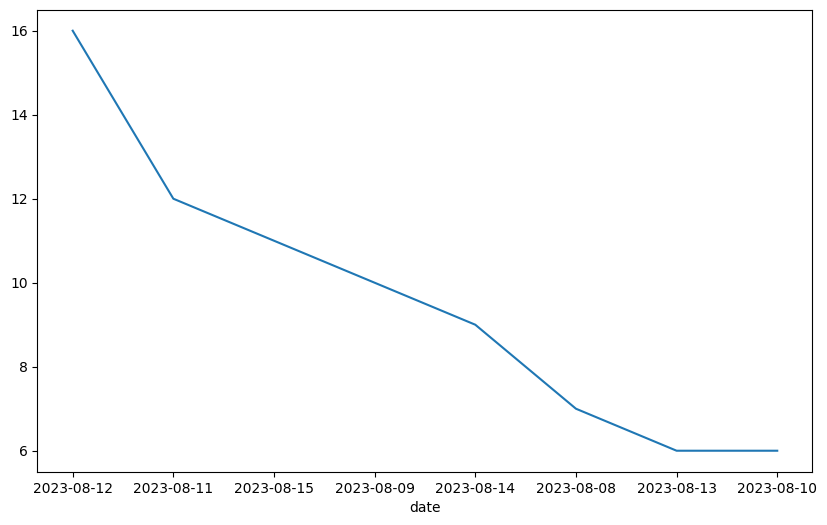

In [ ]:
df_neo['date'].value_counts().plot(figsize=(10,6))